##### The Relevance of Deep Learning for small-data problems

In [1]:
# copying images to training, validation, and test directories

import os, shutil
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow logging below ERROR level

#path to the directory where the original dataset was uncompressed
original_dataset_dir = os.path.join('./dogs-vs-cats')

# directory where you'll store your smaller dataset
base_dir = os.path.join('./dogs-vs-cats/cats_and_dogs_small')

# directories for the training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [2]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


##### Building your network

In [3]:
# instantiating a small convnet for dogs vs. cats classification
from keras import layers
from keras import models
from keras import Input

#TF_ENABLE_ONEDNN_OPTS=2

model = models.Sequential()
model.add(Input(shape=(150, 150, 3)))  # Define the input shape here
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

2024-07-10 00:51:57.794186: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 00:51:57.852690: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-10 00:51:57.852963: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# configuring the model for training
from keras import optimizers

model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(learning_rate=1e-4),
                metrics=['acc'])

##### Data preprocessing

In [22]:
# using ImageDataGenerator to read images from directories

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # target directory
    target_size=(150, 150),  # resize all images to 150x150
    batch_size=100,
    class_mode='binary')  # binary labels

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=50,
    class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (100, 150, 150, 3)
labels batch shape: (100,)


In [23]:
# fitting the model using a batch generator

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50,
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - acc: 0.8475 - loss: 0.3674 - val_acc: 0.7280 - val_loss: 0.5540
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - acc: 0.8515 - loss: 0.3561 - val_acc: 0.7240 - val_loss: 0.5468
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - acc: 0.8585 - loss: 0.3421 - val_acc: 0.7230 - val_loss: 0.5552
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - acc: 0.8622 - loss: 0.3377 - val_acc: 0.7210 - val_loss: 0.5542
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - acc: 0.8769 - loss: 0.3154 - val_acc: 0.7060 - val_loss: 0.6273
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - acc: 0.8538 - loss: 0.3233 - val_acc: 0.7190 - val_loss: 0.5675
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - acc: 0.8634 - loss: 0.3127 - val_acc: 0.7230 - val_loss: 0.5613
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - acc: 0.8690 - loss: 0.3142 - val_acc: 0.7160 - val_loss: 0.5991
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/

In [25]:
# saving the model

model.save('cats_and_dogs_small_1.keras')

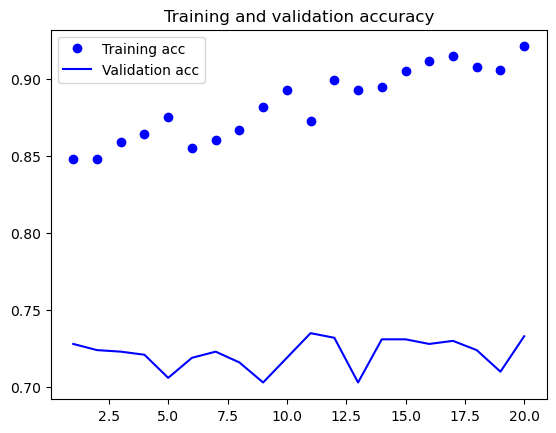

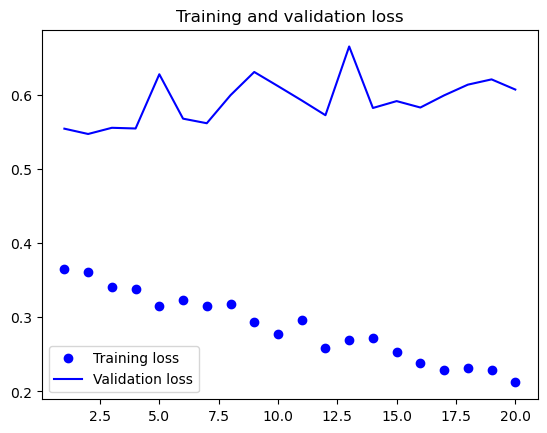

In [24]:
# displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##### Using data augmentation

In [27]:
# setting up a data augmentation configuration via ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',)

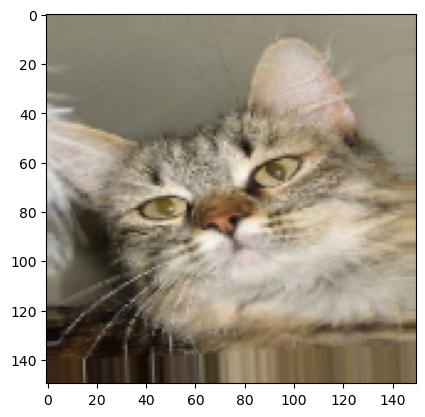

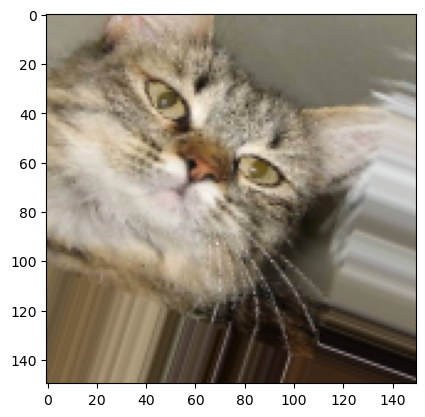

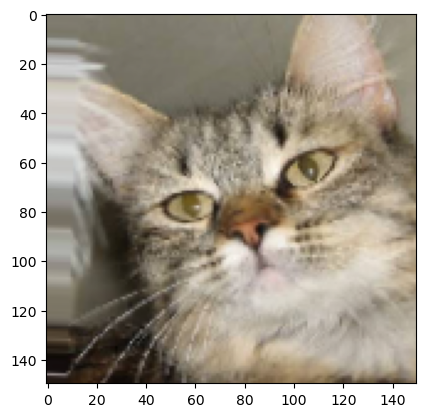

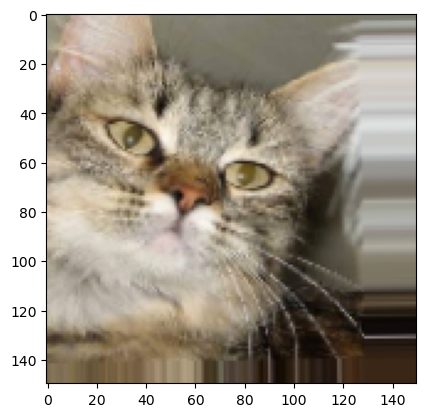

In [59]:
# displaying some randomly augmented training images

from keras.preprocessing import image # Module with image-preprocessing utilities

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[8]  # Chooses one image to augment
img = image.load_img(img_path, target_size=(150, 150))  # reads the image and resizes it

x = image.img_to_array(img)  # Converts it to a numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # reshapes it to (1, 150, 150, 3)

i = 0
for batch in train_datagen.flow(x, batch_size=1): # Generates batches of randomly transformed images, loops indefinitely, so you need to break the loop at some point!
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [61]:
# defining a new convnet that includes dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
               optimizer=optimizers.RMSprop(learning_rate=1e-4),
               metrics=['acc'])

In [62]:
# training the convnet using data-augmentation generators

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)  # Note that the validation data shouldn't be augmented!

train_generator = train_datagen.flow_from_directory(
    train_dir, # target directory
    target_size=(150, 150), # resizes all images to 150x150
    batch_size=32,
    class_mode='binary') #because we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100, 
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


/home/cai/anaconda3/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 63/100 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - acc: 0.5130 - loss: 0.6934 

/home/cai/anaconda3/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - acc: 0.5139 - loss: 0.6934 - val_acc: 0.5470 - val_loss: 0.6906
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - acc: 0.5445 - loss: 0.6909 - val_acc: 0.5280 - val_loss: 0.6886
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - acc: 0.5116 - loss: 0.6886 - val_acc: 0.5650 - val_loss: 0.6794
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - acc: 0.5739 - loss: 0.6797 - val_acc: 0.5260 - val_loss: 0.6846
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - acc: 0.5846 - loss: 0.6720 - val_acc: 0.6100 - val_loss: 0.6566
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - acc: 0.5892 - loss: 0.6655 - val_acc: 0.5750 - val_loss: 0.6621
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - acc: 0.6157 - loss: 0.6561 - val_acc: 0.5250 - val_loss: 0.7188
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - acc: 0.6241 - loss: 0.6489 - val_acc: 0.5620 - val_loss: 0.6729
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/st

In [64]:
# saving the model
model.save('cats_and_dogs_small_2.keras')

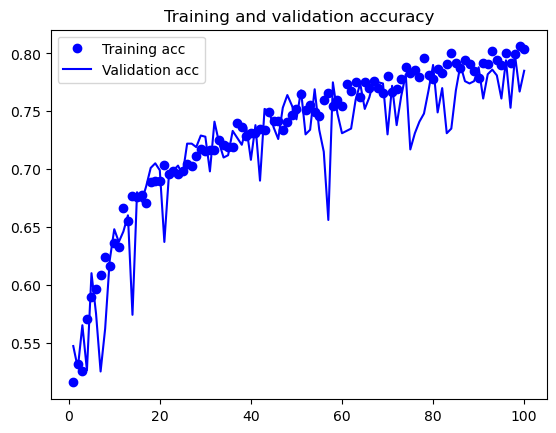

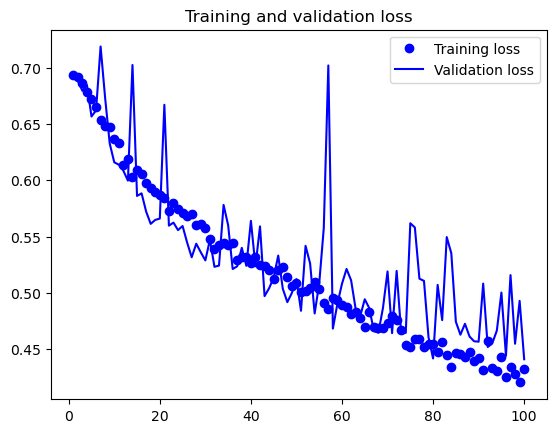

In [63]:
# displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()